# PCA

In [215]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt


In [216]:
x = np.linspace(0.2,1,100)
y = 0.8*x + np.random.randn(100)*0.1
X = np.vstack([x, y]).T
np.random.shuffle(X)

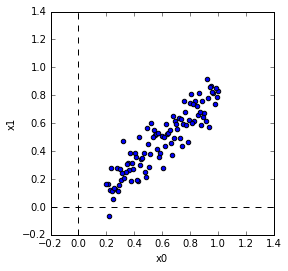

In [217]:
%matplotlib inline

fig = plt.figure()
axes = fig.add_subplot(111,aspect='equal')
axes.scatter(X[:,0],X[:,1])
axes.set_xlim([-0.2, 1.4])
axes.set_ylim([-0.2, 1.4])
axes.set_xlabel('x0')
axes.set_ylabel('x1')
axes.vlines(0,-0.2,1.4,linestyles='dashed')
axes.hlines(0,-0.2,1.4,linestyles='dashed')

In [218]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, n_components=2, whiten=False)

In [219]:
print 'components'
print pca.components_
print 'mean'
print pca.mean_
print 'covariance'
print pca.get_covariance()

components
[[-0.72518    -0.68855934]
 [-0.68855934  0.72518   ]]
mean
[ 0.6         0.47750753]
covariance
[[ 0.05441077  0.04719133]
 [ 0.04719133  0.04951783]]


In [220]:
mn = np.mean(X,axis=0)
z = X - mn
cv = np.cov(z[:,0],z[:,1],bias=1)
W, v = np.linalg.eig(cv)

In [221]:
print 'mean'
print mn
print 'covariance'
print cv
print 'eigenvector'
print v
print 'eigenvalue'
print W

mean
[ 0.6         0.47750753]
covariance
[[ 0.05441077  0.04719133]
 [ 0.04719133  0.04951783]]
eigenvector
[[ 0.72518    -0.68855934]
 [ 0.68855934  0.72518   ]]
eigenvalue
[ 0.099219   0.0047096]


# covariance matrix x eigenvector

In [222]:
print cv.dot(v[:,0].reshape(2,1))

[[ 0.07195164]
 [ 0.06831817]]


In [223]:
print v[:,0]*W[0]

[ 0.07195164  0.06831817]


In [224]:
print cv.dot(v[:,1].reshape(2,1))

[[-0.00324284]
 [ 0.00341531]]


In [225]:
print v[:,1]*W[1]

[-0.00324284  0.00341531]


# draw components

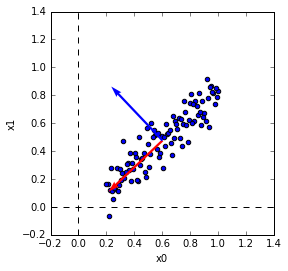

In [226]:
%matplotlib inline

fig = plt.figure()
axes = fig.add_subplot(111,aspect='equal')
axes.scatter(X[:,0],X[:,1])
axes.set_xlim([-0.2, 1.4])
axes.set_ylim([-0.2, 1.4])
axes.set_xlabel('x0')
axes.set_ylabel('x1')
axes.vlines(0,-0.2,1.4,linestyles='dashed')
axes.hlines(0,-0.2,1.4,linestyles='dashed')
axes.quiver(pca.mean_[0], pca.mean_[1], pca.components_[0,0],pca.components_[0,1], color='red', width=0.01, scale=3)
axes.quiver(pca.mean_[0], pca.mean_[1], pca.components_[1,0],pca.components_[1,1], color='blue', width=0.01, scale=3)

# projection

In [227]:
Xd = pca.transform(X)

In [237]:
print pca.components_[0]
print pca.components_[1]
print X[0,:]
print z[0,:]
print pca.components_[0].dot(z[0,:]), pca.components_[1].dot(z[0,:])
print Xd[0,:]


[-0.72518    -0.68855934]
[-0.68855934  0.72518   ]
[ 0.95151515  0.86352948]
[ 0.35151515  0.38602195]
-0.520710775845 0.0378963557547
[-0.52071078  0.03789636]


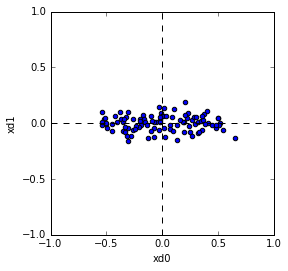

In [228]:
%matplotlib inline

fig = plt.figure()
axes = fig.add_subplot(111,aspect='equal')
axes.scatter(Xd[:,0],Xd[:,1])
axes.set_xlabel('xd0')
axes.set_ylabel('xd1')
axes.set_xlim([-1.0, 1.0])
axes.set_ylim([-1.,1.0])
axes.vlines(0,-1.0,1.0,linestyles='dashed')
axes.hlines(0,-1.0,1.0,linestyles='dashed')


# MNIST

In [302]:
import gzip
image_filename = './data/mnist/train-images-idx3-ubyte.gz'
label_filename = './data/mnist/train-labels-idx1-ubyte.gz'
def _read32(bytestream):
  dt = np.dtype(np.uint32).newbyteorder('>')
  return np.frombuffer(bytestream.read(4), dtype=dt)[0]

with gzip.open(image_filename) as bytestream:
    magic = _read32(bytestream)
    num_images = _read32(bytestream)
    rows = _read32(bytestream)
    cols = _read32(bytestream)
    buf = bytestream.read(rows * cols * num_images)
    data = np.frombuffer(buf, dtype=np.uint8)
    data = data.reshape(num_images, rows, cols)

with gzip.open(label_filename) as bytestream:
    magic = _read32(bytestream)
    num_items = _read32(bytestream)
    buf = bytestream.read(num_items)
    labels = np.frombuffer(buf, dtype=np.uint8)
    

In [303]:
Xall = data[labels == 3, :, :]
X = Xall[0:256,:,:].reshape(256,28*28)
X = X /255.0

In [321]:
N = 50
pca = PCA(n_components=N)
pca.fit(X)

PCA(copy=True, n_components=50, whiten=False)

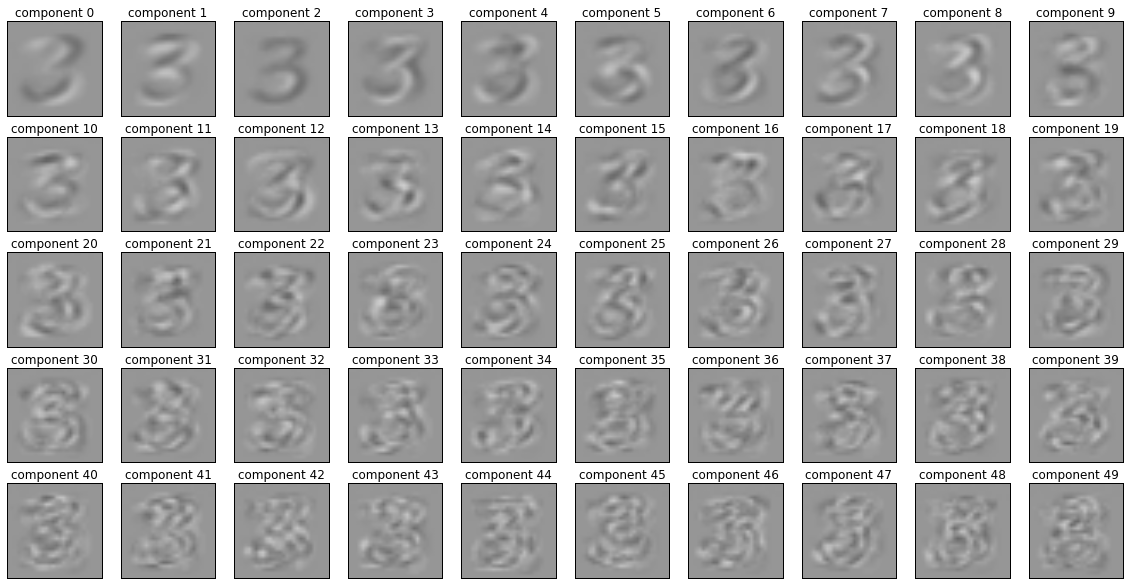

In [322]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

cols = 10
rows = int(np.ceil(N/float(cols)))

fig, axes = plt.subplots(ncols=cols, nrows=rows, figsize=(20,10))


for i in range(N):
    r = i // cols
    c = i % cols
    axes[r, c].imshow(pca.components_[i].reshape(28,28),vmin=-0.5,vmax=0.5, cmap = cm.Greys_r)
    axes[r, c].set_title('component %d' % i)
    axes[r, c].get_xaxis().set_visible(False)
    axes[r, c].get_yaxis().set_visible(False)
    

In [323]:
Xd = pca.transform(X)
print X.shape
print Xd.shape

(256, 784)
(256, 50)


In [324]:
Xe = pca.inverse_transform(Xd)
print Xe.shape

(256, 784)


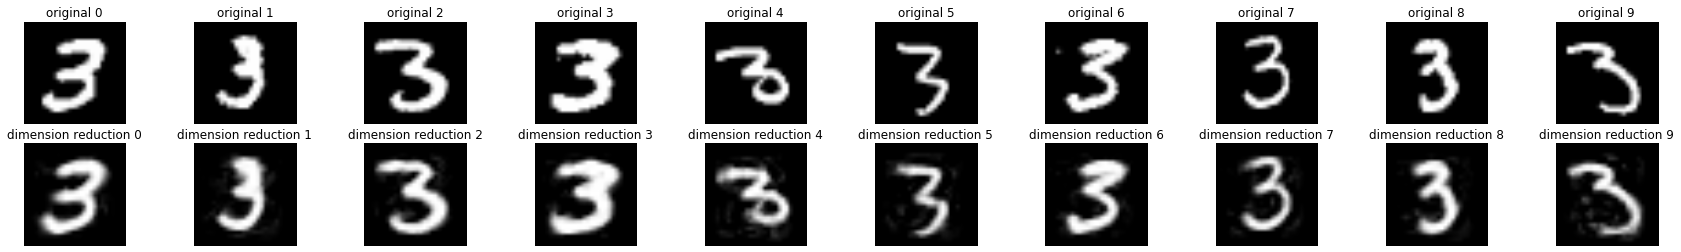

In [329]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm


fig, axes = plt.subplots(ncols=10, nrows=2, figsize=(30,4))


for i in range(10):
    axes[0, i].imshow(X[i,:].reshape(28,28),vmin=0.0,vmax=1.0, cmap = cm.Greys_r)
    axes[0, i].set_title('original %d' % i)
    axes[0, i].get_xaxis().set_visible(False)
    axes[0, i].get_yaxis().set_visible(False)
    
    axes[1, i].imshow(Xe[i,:].reshape(28,28),vmin=0.0,vmax=1.0, cmap = cm.Greys_r)
    axes[1, i].set_title('dimension reduction %d' % i)
    axes[1, i].get_xaxis().set_visible(False)
    axes[1, i].get_yaxis().set_visible(False)


In [310]:
print np.max(Xe), np.min(Xe)

1.37599832276 -0.400784867558
